<h3>Load the data:</h3>


In [83]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images.shape


(60000, 28, 28)

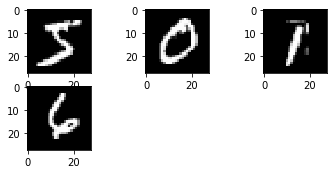

In [125]:
plt.subplot(331)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(332)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(333)
plt.imshow(X_train[67], cmap=plt.get_cmap('gray'))
plt.subplot(334)
plt.imshow(X_train[59000], cmap=plt.get_cmap('gray'))


<h2>Preprocess the data:</h2>

In [126]:
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))
print(train_images.shape)
print(test_images.shape) 

(60000, 784)
(10000, 784)


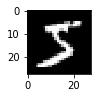

In [127]:
plt.subplot(331)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))


<h2>Define the network:</h2>

In [128]:
from keras.models import Sequential
from keras.layers import Dense

In [129]:
model = Sequential([
  Dense(64, activation='relu',input_dim=784),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

<h2>Compile the network</h2>

In [130]:
model.compile(
  optimizer='rmsprop',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

<h2>Fit the network</h2>

In [131]:
history=model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=20,
  batch_size=256,
  verbose=1,
  validation_data=(test_images, to_categorical(test_labels)),)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 31us/step - loss: 7.9885 - acc: 0.4956 - val_loss: 5.4852 - val_acc: 0.6539
Epoch 2/20
60000/60000 [==============================] - 2s 40us/step - loss: 5.2186 - acc: 0.6690 - val_loss: 4.2843 - val_acc: 0.7264
Epoch 3/20
60000/60000 [==============================] - 3s 42us/step - loss: 4.1422 - acc: 0.7375 - val_loss: 4.0580 - val_acc: 0.7432
Epoch 4/20
60000/60000 [==============================] - 2s 36us/step - loss: 4.0272 - acc: 0.7452 - val_loss: 3.9007 - val_acc: 0.7539
Epoch 5/20
60000/60000 [==============================] - 1s 22us/step - loss: 3.9110 - acc: 0.7529 - val_loss: 3.8998 - val_acc: 0.7537
Epoch 6/20
60000/60000 [==============================] - 1s 24us/step - loss: 3.8732 - acc: 0.7563 - val_loss: 4.3072 - val_acc: 0.7264
Epoch 7/20
60000/60000 [==============================] - 1s 24us/step - loss: 3.8446 - acc: 0.7578 - val_loss: 3.7781 - val_acc

In [132]:
[test_loss, test_acc]=model.evaluate(
  test_images,
  to_categorical(test_labels))
history.history.keys()


10000/10000 [==============================] - 0s 35us/step


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [137]:
model.save_weights('model.h5')

In [138]:
predictions = model.predict(test_images[:5])
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

[7 2 1 6 4]


In [139]:
print(test_labels[:5]) # [7, 2, 1, 0, 4]


[7 2 1 0 4]


Text(0.5, 1.0, 'Accuracy Curves')

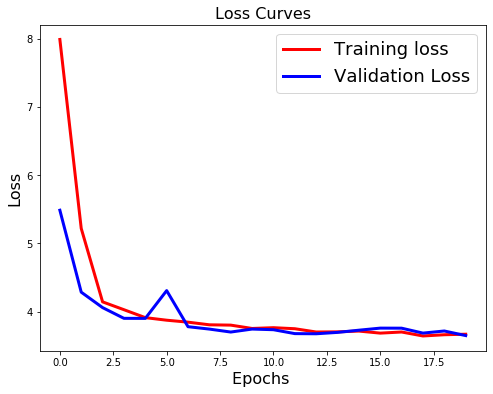

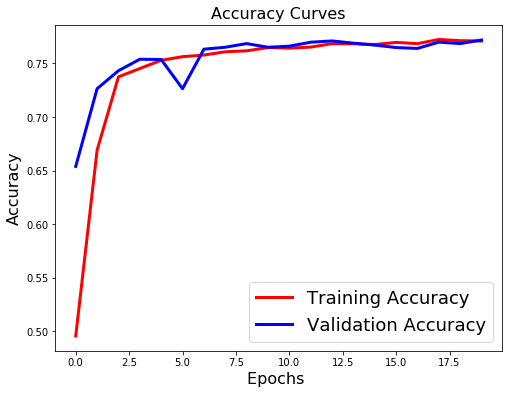

In [140]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)



#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

<h2>Add regularization to model</h2>

In [142]:
from keras.layers import Dropout
 
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_dim=784))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nClasses, activation='softmax'))

<h2>Check performance after regularization</h2>

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 136us/step - loss: 11.1103 - acc: 0.3082 - val_loss: 8.9756 - val_acc: 0.4415
Epoch 2/20
60000/60000 [==============================] - 8s 140us/step - loss: 9.3498 - acc: 0.4184 - val_loss: 8.0452 - val_acc: 0.4996
Epoch 3/20
60000/60000 [==============================] - 8s 135us/step - loss: 8.6718 - acc: 0.4606 - val_loss: 7.9011 - val_acc: 0.5085
Epoch 4/20
60000/60000 [==============================] - 7s 115us/step - loss: 8.3949 - acc: 0.4779 - val_loss: 7.7582 - val_acc: 0.5182
Epoch 5/20
60000/60000 [==============================] - 6s 98us/step - loss: 7.2992 - acc: 0.5455 - val_loss: 6.2211 - val_acc: 0.6133
Epoch 6/20
60000/60000 [==============================] - 6s 98us/step - loss: 6.5354 - acc: 0.5936 - val_loss: 6.1460 - val_acc: 0.6183
Epoch 7/20
60000/60000 [==============================] - 6s 98us/step - loss: 6.4810 - acc: 0.5970 - val_loss: 5.9988 - va

Text(0.5, 1.0, 'Accuracy Curves')

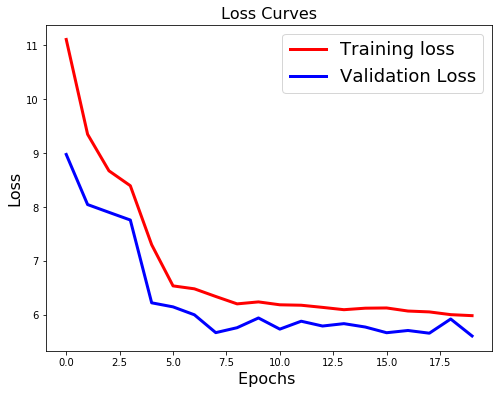

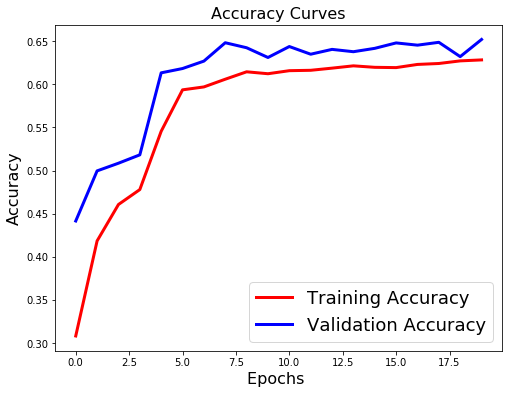

In [145]:
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_reg = model_reg.fit(train_images, to_categorical(train_labels), batch_size=256, epochs=20, verbose=1, 
                            validation_data=(test_images, to_categorical(test_labels)))
 
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['acc'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)